In [44]:
#importing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('pp-2021_cleaned.csv')
df.head()

,price,date,region
0,477000,10/05/2021,South East
1,370000,06/05/2021,South East
2,462500,28/04/2021,South East
3,433000,06/08/2021,South East
4,676000,05/08/2021,South East


In [46]:
df['date']=pd.to_datetime(df.date, dayfirst=True, format="%d/%m/%Y") 
df_index=df.copy()
df_index.set_index('date',inplace=True)
df_index.head()

,price,region
date,,
2021-05-10,477000,South East
2021-05-06,370000,South East
2021-04-28,462500,South East
2021-08-06,433000,South East
2021-08-05,676000,South East


In [72]:
house_prices=df_index.resample('d').sum()
house_prices.head()

,price,region
date,,
2021-01-01,11904313,AngliaEast MidlandsSouth EastSouth EastSouth E...
2021-01-02,2484950,LondonSouth WestWest MidlandsSouth EastEast Mi...
2021-01-03,4501950,LondonSouth WestNorth WestSouth EastAngliaSout...
2021-01-04,181140946,LondonSouth WestYorkshire and HumberSouth East...
2021-01-05,521710573,LondonLondonSouth EastSouth EastLondonWalesLon...


In [34]:
print(df.dtypes)

price            float64
date      datetime64[ns]
region            object
dtype: object


In [50]:
print(house_prices.columns)

Index(['price', 'region'], dtype='object')


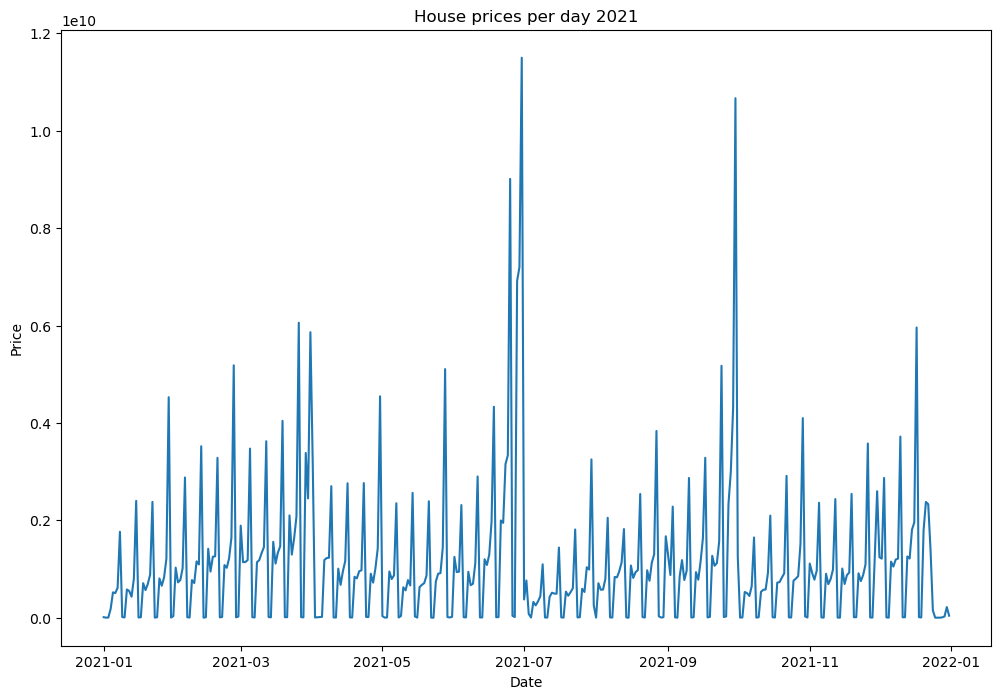

In [52]:
fig, ax = plt.subplots(figsize=(12,8)) 
ax.plot(house_prices.index,house_prices.price) 
ax.set_title('House prices per day 2021')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.show()

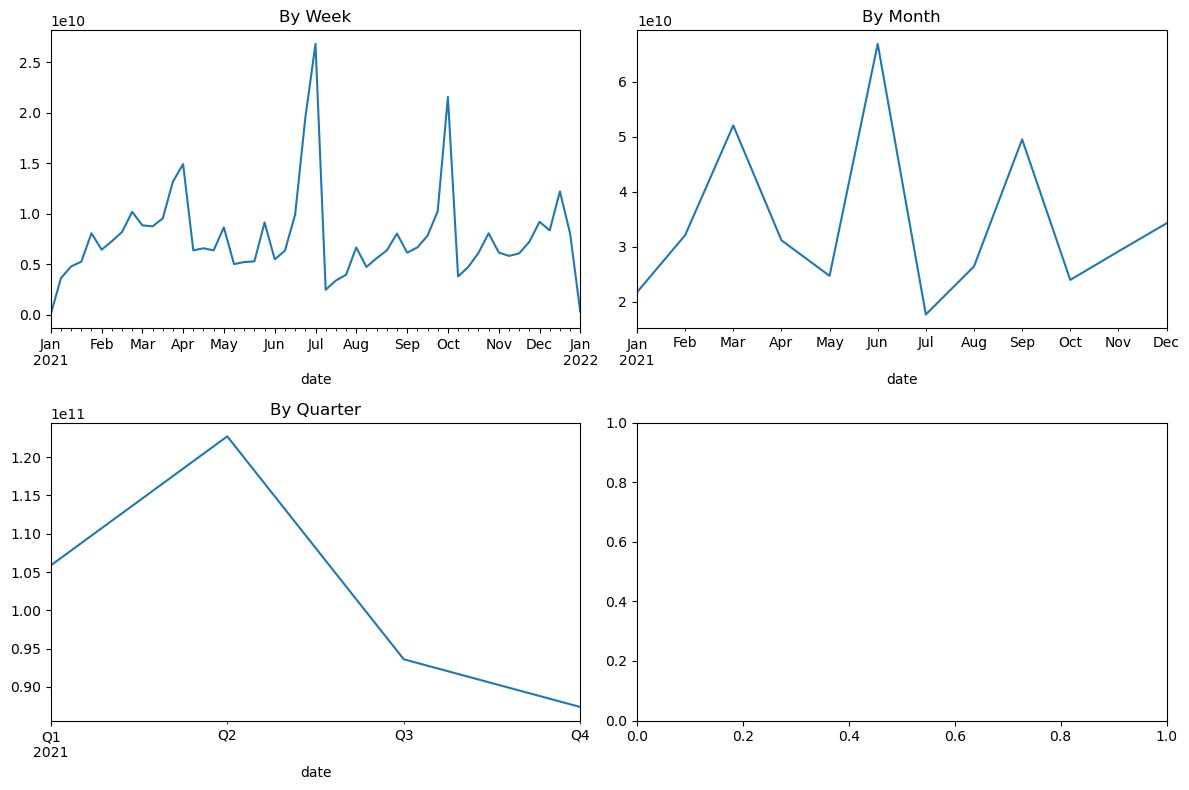

In [54]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(12,8))
house_prices.price.resample('w').sum().plot(ax=ax[0,0]) # group by week
house_prices.price.resample('m').sum().plot(ax=ax[0,1]) # group by month
house_prices.price.resample('q').sum().plot(ax=ax[1,0]) # group by quarter
ax[0,0].set_title('By Week')
ax[0,1].set_title('By Month')
ax[1,0].set_title('By Quarter')
fig.tight_layout()
plt.show()

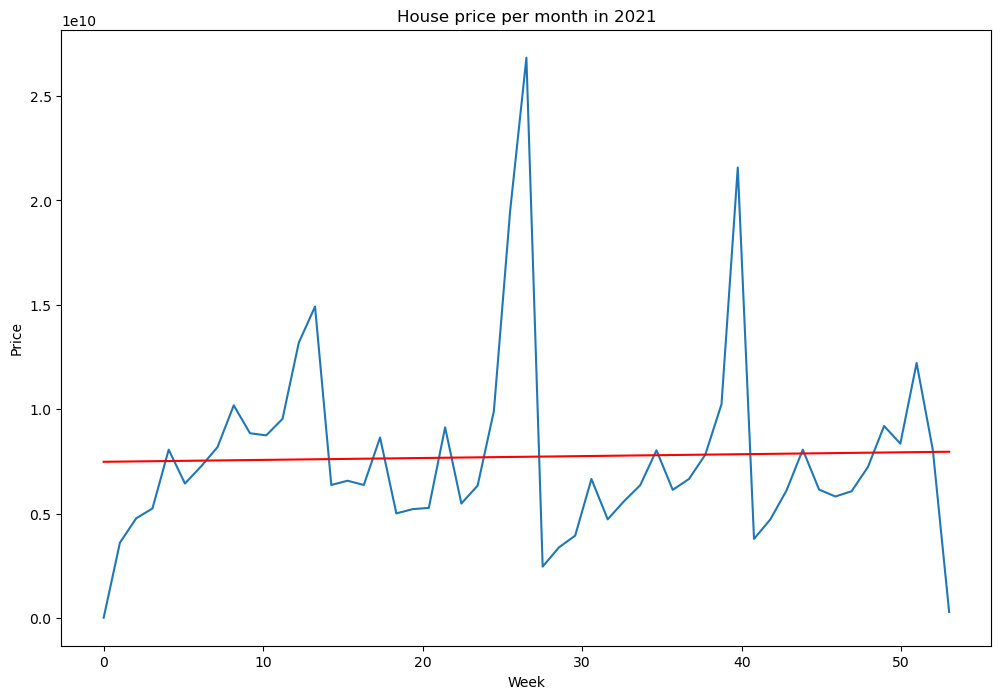

In [80]:
houseprice_by_month=house_prices.resample('w').sum() # creating a dataframe which shows the total house price by month

data_points=np.linspace(0,len(houseprice_by_month),num=len(houseprice_by_month)) # list of data points as long as dataframe

line_coef = np.polyfit(data_points,houseprice_by_month.price,1) # Identifying the trendline of the monthly price

polynomial = np.poly1d(line_coef) # Function that for any independent variable given, will return the dependent variable

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(data_points,houseprice_by_month.price)
ax.plot(data_points, polynomial(data_points),c='red')
ax.set_title('House price per month in 2021')
ax.set_ylabel('Price')
ax.set_xlabel('Week')
plt.show()

In [58]:
houseprice_by_month=house_prices.resample('m').sum() 
houseprice_by_month = houseprice_by_month[:-1] #remove the last data point
houseprice_by_month.head()

,price,region
date,,
2021-01-31,21728623176,AngliaEast MidlandsSouth EastSouth EastSouth E...
2021-02-28,32095657059,AngliaAngliaNorth WestSouth EastEast MidlandsS...
2021-03-31,52034144575,LondonNorth WestNorth WestSouth EastSouth East...
2021-04-30,31169346945,South EastSouth EastLondonYorkshire and Humber...
2021-05-31,24702529418,AngliaNorth WestYorkshire and HumberNorth East...


In [64]:
train=houseprice_by_month['2021':'2021'] # create training dataset
test=houseprice_by_month['2021'] # create test dataset

fig, ax = plt.subplots(figsize=(20,8))
train.price.plot(ax=ax,label='train')
test.price.plot(ax=ax,label='test')
plt.legend()
plt.show()

KeyError: '2021'